# Prediction of Gold spot price - Himanshu Bhardwaj

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gold = pd.read_csv('HistoricalData_silver.csv')

In [3]:
gold.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,1648.3,186519.0,1667.2,1670.9,1640.7
1,10/27/2022,1668.8,180599.0,1668.8,1674.8,1658.5
2,10/26/2022,1669.2,183453.0,1657.7,1679.4,1653.8
3,10/25/2022,1658.0,178706.0,1654.5,1666.8,1641.2
4,10/24/2022,1654.1,167448.0,1662.9,1675.5,1648.0


In [4]:
gold['Date'] = pd.to_datetime(gold['Date'])

In [5]:
import seaborn as sns

In [6]:
gold.set_index('Date', inplace=True)

In [7]:
gold.sort_index(ascending=True, inplace=True)

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


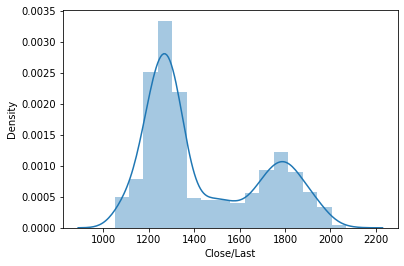

In [8]:
sns.distplot(gold['Close/Last'])

In [9]:
import datetime as datetime

In [10]:
st = datetime.datetime(2017,10,28)
en = datetime.datetime(2022,10,28)

In [11]:
gold_5 = gold[st:en]

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


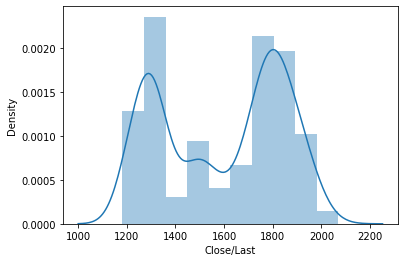

In [12]:
sns.distplot(gold_5['Close/Last'])

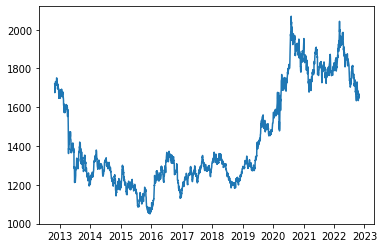

In [13]:
plt.plot(gold['Close/Last'])

In [14]:
gold_m = gold.resample('M').mean().dropna()

In [15]:
gold_y = gold.resample('Y').mean().dropna()

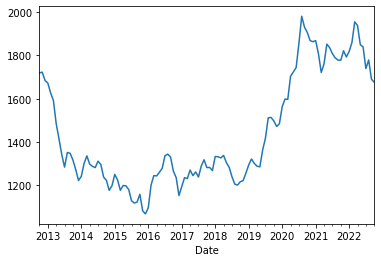

In [16]:
gold_m['Close/Last'].plot()

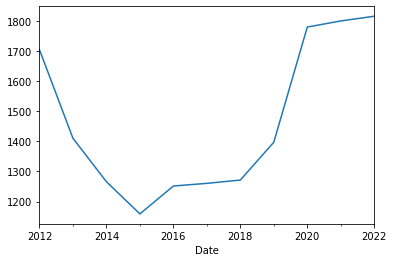

In [17]:
gold_y['Close/Last'].plot()

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

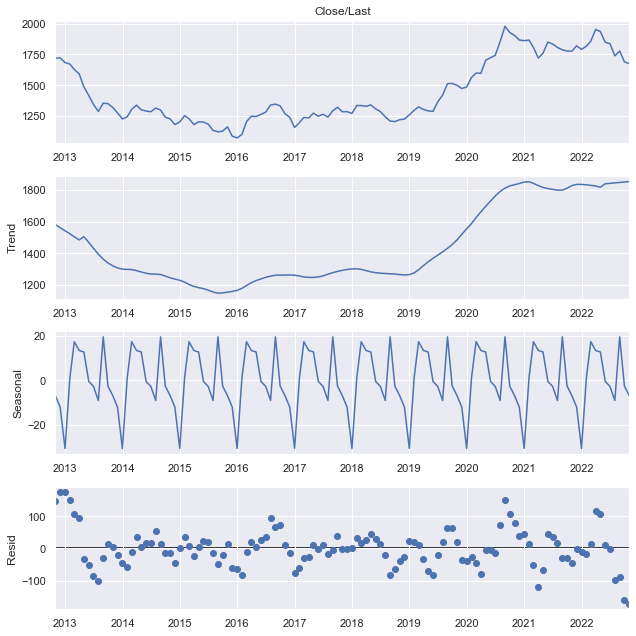

In [19]:
sns.set()
decomp = seasonal_decompose(x=gold_m['Close/Last'], model='additive', extrapolate_trend='freq', period=12)
plt.rcParams.update({'figure.figsize': (9,9)})
decomp.plot()
plt.show()

In [20]:
ds = gold_m['Close/Last']

<Figure size 720x216 with 0 Axes>

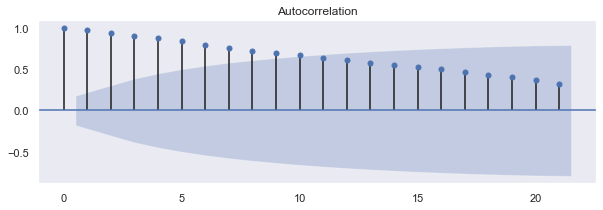

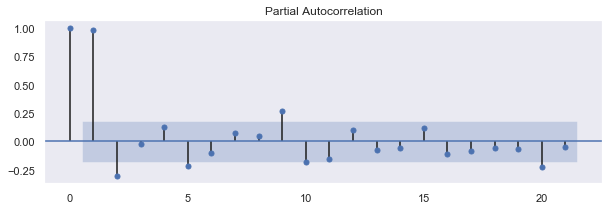

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams["figure.figsize"] = (10,3)
plt.figure(figsize=(10,3))
plot_acf(ds)
plt.grid()
plot_pacf(ds)
plt.grid()
plt.show()

In [22]:
import pmdarima as pm

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [23]:
smodel = pm.auto_arima(ds, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1155.333, BIC=1168.743, Fit time=2.772 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1207.366, BIC=1212.730, Fit time=0.060 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1178.523, BIC=1189.251, Fit time=1.111 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1153.849, BIC=1164.578, Fit time=1.363 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1155.068, BIC=1168.478, Fit time=1.435 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1200.695, BIC=1208.741, Fit time=0.324 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1154.829, BIC=1168.240, Fit time=5.522 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1156.364, BIC=1172.457, Fit time=8.153 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=1160.267, BIC=1168.313, Fit time=0.819 seconds
Fit ARIMA: order=(0, 1, 2) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  121
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -572.925
Date:                            Wed, 02 Nov 2022   AIC                           1153.849
Time:                                    10:07:23   BIC                           1164.578
Sample:                                         0   HQIC                          1158.199
                                            - 121                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.6080      1.606      1.624      0.104      -0.539       5.755
ma.L1          0.2636      0.105      2.522      0.012       0.059       0.468
ma.S.L12      -0.9984     13.102     -0.076      0.939     -26.678      24.681
sigma2      1840.3603    2.4e+04      0.077      0.939   -4.52e+04    4.89e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.30
Prob(Q):                              0.86   Prob(JB):                         0.86
Heteroskedasticity (H):               1.70   Skew:                            -0.11
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
pre_res, conif = smodel.predict(n_periods=180, return_conf_int=True)

In [25]:
index_of_fc = pd.date_range(ds.index[-1], periods = 180, freq='MS')

In [26]:
fitted_series = pd.Series(pre_res, index=index_of_fc)
lower_series = pd.Series(conif[:, 0], index=index_of_fc)
upper_series = pd.Series(conif[:, 1], index=index_of_fc)

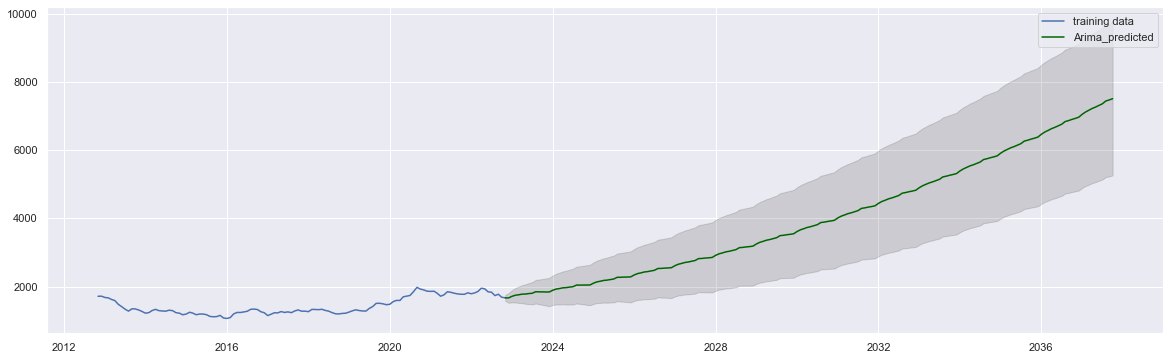

In [27]:
plt.rcParams["figure.figsize"] = (20,6)
plt.plot(ds, label='training data')
#plt.plot(test, label='testing data')
plt.plot(fitted_series, color='darkgreen', label='Arima_predicted')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
plt.legend()

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


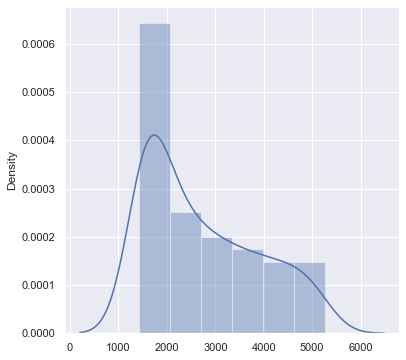

In [28]:
plt.rcParams["figure.figsize"] = (6,6)
sns.distplot(lower_series)

In [35]:
dresult = pd.DataFrame(columns = ['95%_lower', 'mean','95%_upper'])

In [36]:
dresult['95%_lower'] = lower_series
dresult['mean'] = fitted_series
dresult['95%_upper'] = upper_series

In [42]:
dresult['sigma'] = (dresult['mean']-dresult['95%_lower'])/1.96

In [43]:
dresult.head()

,95%_lower,mean,95%_upper,sigma
2022-11-01,1584.556128,1672.698140,1760.840153,44.970414
2022-12-01,1528.438613,1670.445909,1812.453206,72.452702
2023-01-01,1538.212430,1718.664938,1899.117447,92.067606
2023-02-01,1538.810292,1750.848362,1962.886433,108.182689
2023-03-01,1523.021851,1762.515439,2002.009027,122.190606


In [44]:
dresult.to_csv('Arima_result_gold_price.csv')

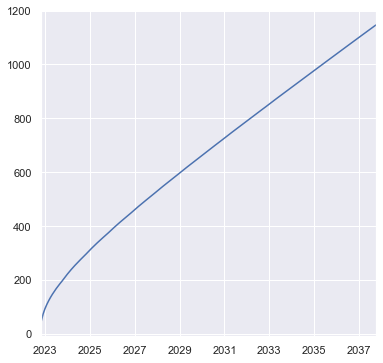

In [45]:
dresult['sigma'].plot()